##### Final Exam - DTSC6007001 Deep Learning
<br>
Nama: Vira Fitriyani <br>
NIM: 2602068706 <br>
Nomor 1 - Time Series Data
<br>
Link Video: https://youtu.be/h9zgRUw3uq0 

#### Library

In [64]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

#### Load Data

In [65]:
path = 'Dataset Stock/Dataset B'

df1 = pd.read_csv(os.path.join(path, 'AMZN.csv'))
df2 = pd.read_csv(os.path.join(path, 'CSCO.csv'))

In [66]:
# Menampilkan 5 data teratas
print('Ticker: AMZN \n', df1.head(), "\n")
print('Ticker: CSCO \n', df2.head(), "\n")

Ticker: AMZN 
          Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200 

Ticker: CSCO 
          Date  Open      High       Low     Close  Adj Close     Volume
0  1990-02-16   0.0  0.079861  0.073785  0.077257   0.059806  940636800
1  1990-02-20   0.0  0.079861  0.074653  0.079861   0.061822  151862400
2  1990-02-21   0.0  0.078993  0.075521  0.078125   0.060478   70531200
3  1990-02-22   0.0  0.081597  0.078993  0.078993   0.061150   45216000
4  1990-02-23   0.0  0.079861  0.078125  0.078559   0.060814   44697600 



In [67]:
# Menampilkan kolom, ukuran dataset, dan informasi null value dataset
print('Ticker: AMZN \n', df1.columns, "\n")
print(df1.shape, "\n")
print(df1.info(), "\n")

print('Ticker: CSCO \n', df2.columns, "\n")
print(df2.shape, "\n")
print(df2.info(), "\n")

Ticker: AMZN 
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

(5758, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5758 non-null   object 
 1   Open       5758 non-null   float64
 2   High       5758 non-null   float64
 3   Low        5758 non-null   float64
 4   Close      5758 non-null   float64
 5   Adj Close  5758 non-null   float64
 6   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.0+ KB
None 

Ticker: CSCO 
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

(7589, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7589 entries, 0 to 7588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7589 non-null   object 
 1   

#### Exploratory Data

In [68]:
# Membagi parsing data berdasarkan "Date"
df1 = pd.read_csv(os.path.join(path, 'AMZN.csv'), parse_dates=['Date'], index_col=['Date'])
df2 = pd.read_csv(os.path.join(path, 'CSCO.csv'), parse_dates=['Date'], index_col=['Date'])

In [69]:
print('Ticker: AMZN \n', df1.head(), "\n")
print('Ticker: CSCO \n', df2.head(), "\n")

Ticker: AMZN 
                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200 

Ticker: CSCO 
             Open      High       Low     Close  Adj Close     Volume
Date                                                                
1990-02-16   0.0  0.079861  0.073785  0.077257   0.059806  940636800
1990-02-20   0.0  0.079861  0.074653  0.079861   0.061822  151862400
1990-02-21   0.0  0.078993  0.075521  0.078125   0.060478   70531200
1990-02-22   0.0  0.081597  0.078993  0.078993   0.061150   45216000
1990-02-23   0.0  0.079861  0.078125  0.078559   0

In [70]:
print('Ticker: AMZN \n', df1.columns, "\n")
print(df1.shape, "\n")
print(df1.info(), "\n")

print('Ticker: CSCO \n', df2.columns, "\n")
print(df2.shape, "\n")
print(df2.info(), "\n")

Ticker: AMZN 
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

(5758, 6) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5758 non-null   float64
 1   High       5758 non-null   float64
 2   Low        5758 non-null   float64
 3   Close      5758 non-null   float64
 4   Adj Close  5758 non-null   float64
 5   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 314.9 KB
None 

Ticker: CSCO 
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

(7589, 6) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7589 non-null   float64
 1   High       7589 non-null   float

In [71]:
# Filtering kolom yang digunakan yaitu 'Close'
historis_AMZN = pd.DataFrame(df1['Close'])
print("Ticker: AMZN \n")
historis_AMZN

Ticker: AMZN 



,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2020-03-26,1955.489990
2020-03-27,1900.099976
2020-03-30,1963.949951


In [72]:
historis_CSCO = pd.DataFrame(df2['Close'])
print("Ticker: CSCO \n")
historis_CSCO

Ticker: CSCO 



,Close
Date,
1990-02-16,0.077257
1990-02-20,0.079861
1990-02-21,0.078125
1990-02-22,0.078993
1990-02-23,0.078559
...,...
2020-03-26,40.580002
2020-03-27,38.820000
2020-03-30,40.320000


In [73]:
# Deskriptif statistik dataset
historis_AMZN.describe()

,Close
count,5758.000000
mean,340.417580
std,523.140207
min,1.395833
25%,37.562500
50%,81.599998
75%,334.290001
max,2170.219971


In [74]:
historis_CSCO.describe()

,Close
count,7589.000000
mean,20.399541
std,14.906589
min,0.071181
25%,8.479167
50%,19.680000
75%,27.120001
max,80.062500


Text(0, 0.5, 'Close AMZN')

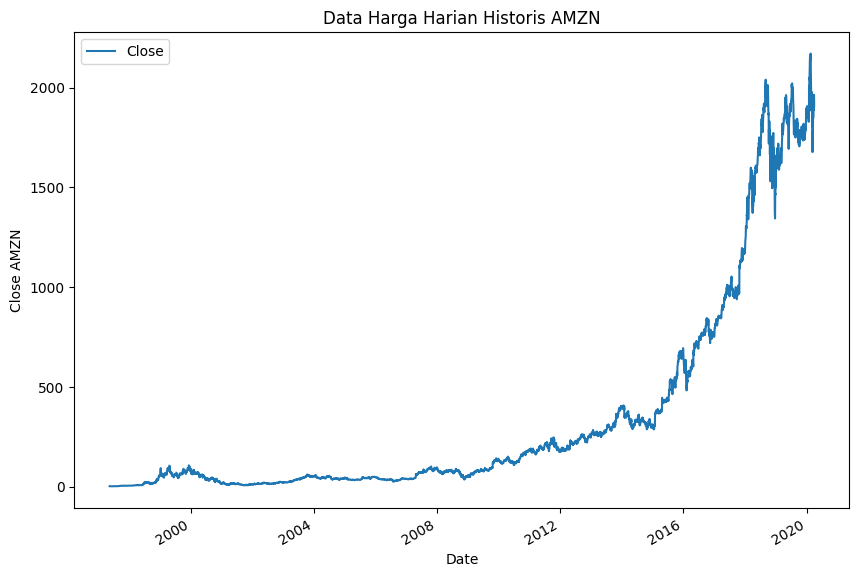

In [75]:
# Plotting Time Series AMZN
historis_AMZN.plot(figsize=(10,7))
plt.title("Data Harga Harian Historis AMZN")
plt.xlabel("Date")
plt.ylabel("Close AMZN")

Text(0, 0.5, 'Close CSCO')

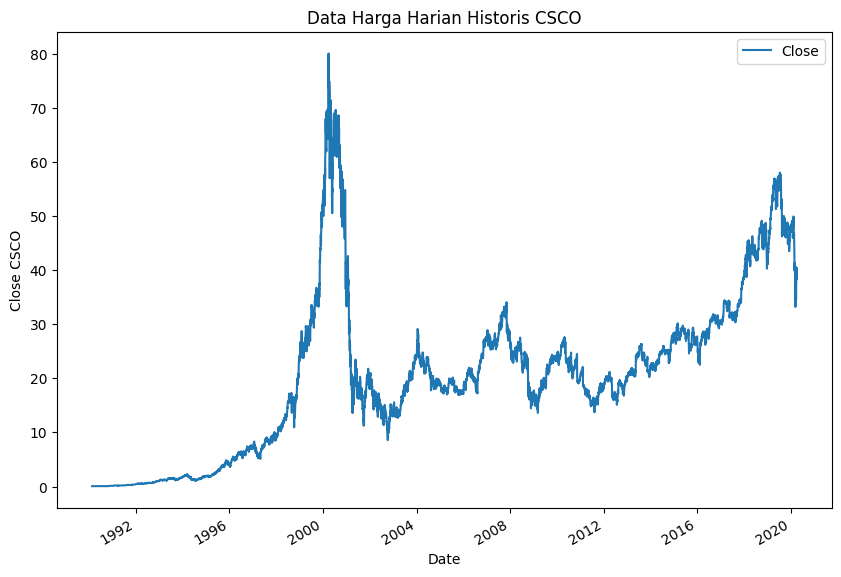

In [76]:
# Plotting Time Series AMZN
historis_CSCO.plot(figsize=(10,7))
plt.title("Data Harga Harian Historis CSCO")
plt.xlabel("Date")
plt.ylabel("Close CSCO")

#### Praproses Data

In [77]:
# Memisahkan data time series menjadi input dan output dengan window size=5 dan horizon=1

def windowed_data(data, dates, window_size):
    x, y, date_x, date_y = [], [], [], []       # inisialisasi array kosong untuk array list dataset value x, y, dan index time
    horizon = 1                                 

    for i in range(len(data) - window_size):      # iterasi dari awal dataframe hingga akhir, dengan batas window_size
        x.append(data[i:(i + window_size)])     # fitur input
        y.append(data[(i + window_size): (i + window_size + horizon)])  # nilai target prediksi
        date_x.append(dates[i:(i + window_size)])  # mengambil tanggal dalam window sebagai tanggal input
        date_y.append(dates[(i + window_size): (i + window_size + horizon)])  # mengambil tanggal horizon sebagai tanggal output

    return np.array(x), np.array(y), np.array(date_x), np.array(date_y)

In [78]:
window_size = 5
x1, y1, date_x1, date_y1 = windowed_data(historis_AMZN.values.reshape(-1, 1), historis_AMZN.index.values, window_size)
print("Ticker AMZN -> x shape:", x1.shape, ", y shape:", y1.shape, ", date_x shape:", date_x1.shape, ", date_y shape:", date_y1.shape)

x2, y2, date_x2, date_y2 = windowed_data(historis_CSCO.values.reshape(-1, 1), historis_CSCO.index.values, window_size)
print("Ticker CSCO -> x shape:", x2.shape, ", y shape:", y2.shape, ", date_x shape:", date_x2.shape, ", date_y shape:", date_y2.shape)

Ticker AMZN -> x shape: (5753, 5, 1) , y shape: (5753, 1, 1) , date_x shape: (5753, 5) , date_y shape: (5753, 1)
Ticker CSCO -> x shape: (7584, 5, 1) , y shape: (7584, 1, 1) , date_x shape: (7584, 5) , date_y shape: (7584, 1)


In [79]:
x1[:2], date_x1[:2]  # menampilkan 2 windowed dataset

(array([[[1.95833337],
         [1.72916663],
         [1.70833337],
         [1.63541663],
         [1.42708337]],
 
        [[1.72916663],
         [1.70833337],
         [1.63541663],
         [1.42708337],
         [1.39583337]]]),
 array([['1997-05-15T00:00:00.000000000', '1997-05-16T00:00:00.000000000',
         '1997-05-19T00:00:00.000000000', '1997-05-20T00:00:00.000000000',
         '1997-05-21T00:00:00.000000000'],
        ['1997-05-16T00:00:00.000000000', '1997-05-19T00:00:00.000000000',
         '1997-05-20T00:00:00.000000000', '1997-05-21T00:00:00.000000000',
         '1997-05-22T00:00:00.000000000']], dtype='datetime64[ns]'))

In [80]:
# Split data 80% train, 10% validation, 10% test
def split_data(x, y, date_x, date_y, val_split=0.1, test_split=0.1):
  train_size = int(len(x) * (1-val_split-test_split))   # 1-0.1-0.1 -> 0.8
  val_size = int(len(x) * val_split)
  test_size = int(len(x) * test_split)

  # 80% data awal dari index 0
  x_train = x[:train_size]           
  y_train = y[:train_size]            
  date_x_train = date_x[:train_size]
  date_y_train = date_y[:train_size]

  # 10% data setelah index train data
  x_val = x[train_size:train_size + val_size]
  y_val = y[train_size:train_size + val_size]
  date_x_val = date_x[train_size:train_size + val_size]
  date_y_val = date_y[train_size:train_size + val_size]

  # 10% data setelah data train + val hingga index akhir
  x_test = x[train_size + val_size:]
  y_test = y[train_size + val_size:]
  date_x_test = date_x[train_size + val_size:]
  date_y_test = date_y[train_size + val_size:]

  return x_train, y_train, date_x_train, date_y_train, x_val, y_val, date_x_val, date_y_val, x_test, y_test, date_x_test, date_y_test

In [81]:
x_train_amzn, y_train_amzn, date_x_train_amzn, date_y_train_amzn, x_val_amzn, y_val_amzn, date_x_val_amzn, date_y_val_amzn, x_test_amzn, y_test_amzn, date_x_test_amzn, date_y_test_amzn = split_data(x1, y1, date_x1, date_y1)
print("AMZN Train: \n x shape:", x_train_amzn.shape, ", y shape:", y_train_amzn.shape, ", date_x shape:", date_x_train_amzn.shape, ", date_y shape:", date_y_train_amzn.shape)
print("\nAMZN Validation: \n x shape:", x_val_amzn.shape, ", y shape:", y_val_amzn.shape, ", date_x shape:", date_x_val_amzn.shape, ", date_y shape:", date_y_val_amzn.shape)
print("\nAMZN Test: \n x shape:", x_test_amzn.shape, ", y shape:", y_test_amzn.shape, ", date_x shape:", date_x_test_amzn.shape, ", date_y shape:", date_y_test_amzn.shape)

AMZN Train: 
 x shape: (4602, 5, 1) , y shape: (4602, 1, 1) , date_x shape: (4602, 5) , date_y shape: (4602, 1)

AMZN Validation: 
 x shape: (575, 5, 1) , y shape: (575, 1, 1) , date_x shape: (575, 5) , date_y shape: (575, 1)

AMZN Test: 
 x shape: (576, 5, 1) , y shape: (576, 1, 1) , date_x shape: (576, 5) , date_y shape: (576, 1)


In [82]:
x_train_csco, y_train_csco, date_x_train_csco, date_y_train_csco, x_val_csco, y_val_csco, date_x_val_csco, date_y_val_csco, x_test_csco, y_test_csco, date_x_test_csco, date_y_test_csco = split_data(x2, y2, date_x2, date_y2)
print("CSCO Train: \n x shape:", x_train_csco.shape, ", y shape:", y_train_csco.shape, ", date_x shape:", date_x_train_csco.shape, ", date_y shape:", date_y_train_csco.shape)
print("\nCSCO Validation: \n x shape:", x_val_csco.shape, ", y shape:", y_val_csco.shape, ", date_x shape:", date_x_val_csco.shape, ", date_y shape:", date_y_val_csco.shape)
print("\nCSCO Test: \n x shape:", x_test_csco.shape, ", y shape:", y_test_csco.shape, ", date_x shape:", date_x_test_csco.shape, ", date_y shape:", date_y_test_csco.shape)

CSCO Train: 
 x shape: (6067, 5, 1) , y shape: (6067, 1, 1) , date_x shape: (6067, 5) , date_y shape: (6067, 1)

CSCO Validation: 
 x shape: (758, 5, 1) , y shape: (758, 1, 1) , date_x shape: (758, 5) , date_y shape: (758, 1)

CSCO Test: 
 x shape: (759, 5, 1) , y shape: (759, 1, 1) , date_x shape: (759, 5) , date_y shape: (759, 1)


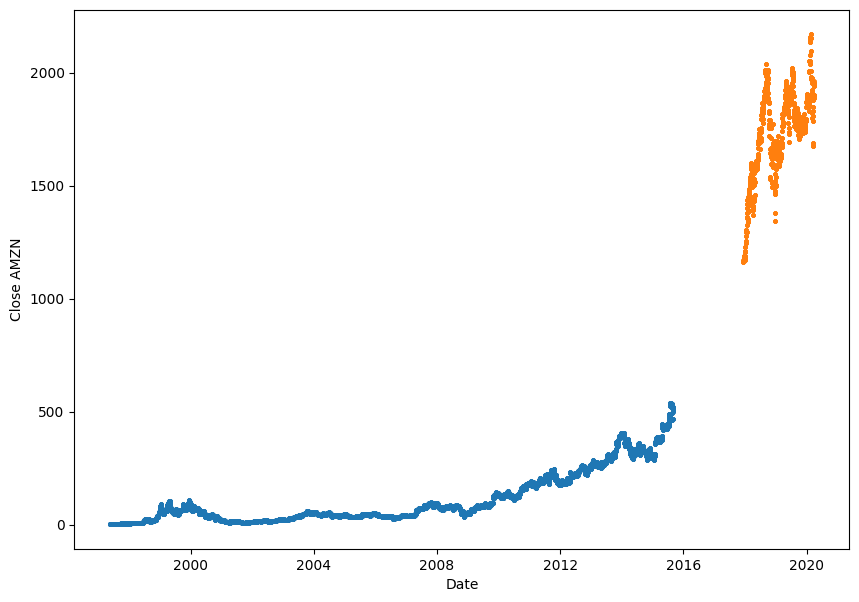

In [83]:
plt.figure(figsize=(10,7))
plt.scatter(date_x_train_amzn, x_train_amzn, s=5, label="Train data")
plt.scatter(date_x_test_amzn, x_test_amzn, s=5, label="Test data")
plt.xlabel('Date')
plt.ylabel('Close AMZN')
plt.show()

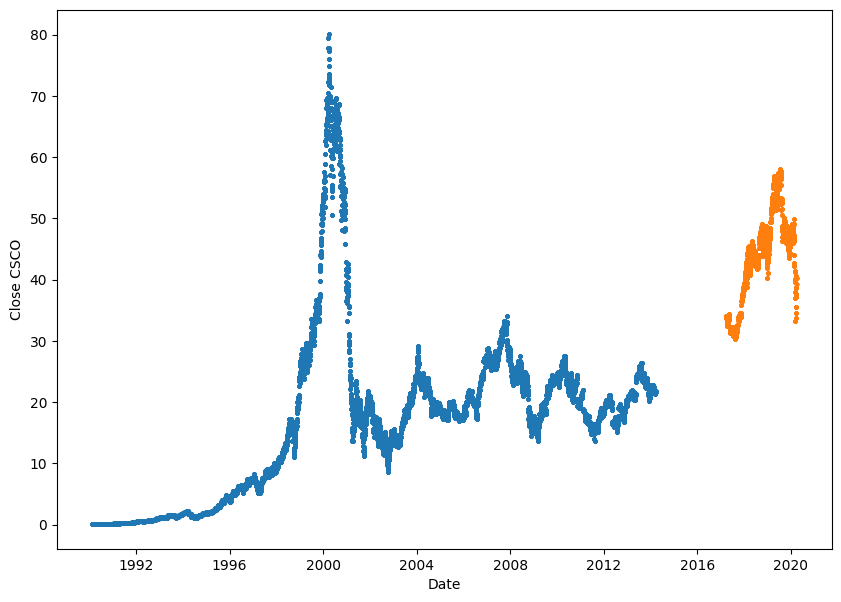

In [84]:
plt.figure(figsize=(10,7))
plt.scatter(date_x_train_csco, x_train_csco, s=5, label="Train data")
plt.scatter(date_x_test_csco, x_test_csco, s=5, label="Test data")
plt.xlabel('Date')
plt.ylabel('Close CSCO')
plt.show()

#### Arsitektur Baseline

LSTM(units=50)
<br>
Layer akhir = node perceptron units=1
<br>
Activation function ReLU

In [85]:
def create_LSTM():
  baseline_model = Sequential()
  baseline_model.add(LSTM(units=50, activation='relu', input_shape=(5, 1)))   # 5 time step dan 1 fitur "Close"
  baseline_model.add(Dense(units=1))    # output layer
  baseline_model.compile(optimizer='adam', loss='mse')

  return baseline_model

In [86]:
model_AMZN = create_LSTM()
model_AMZN.summary()

c:\Users\Vira Fitriyani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
history_AMZN = model_AMZN.fit(x_train_amzn, y_train_amzn, epochs=10, validation_data=(x_val_amzn, y_val_amzn))

Epoch 1/10


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3482.6128 - val_loss: 276.6677
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.3417 - val_loss: 684.2540
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.8580 - val_loss: 298.2300
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.7332 - val_loss: 459.7327
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.9120 - val_loss: 324.7512
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19.2790 - val_loss: 436.1562
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.2452 - val_loss: 473.9480
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7959 - val_loss: 322.4455
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.8503 - val_loss: 420.4428
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.8249 - val_loss: 324.3507


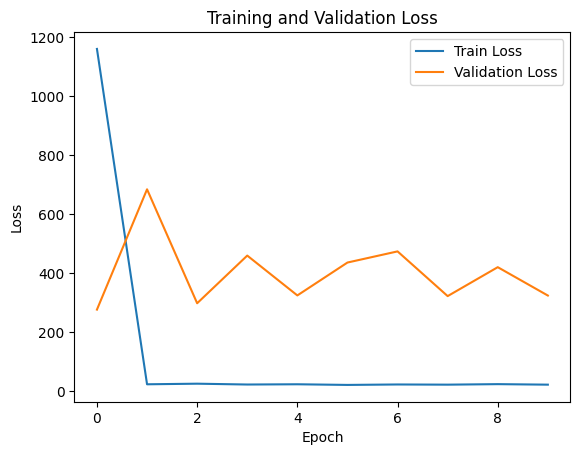

In [88]:
# Plot training and validation Loss
plt.plot(history_AMZN.history['loss'], label='Train Loss')
plt.plot(history_AMZN.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretasi: <br>
* Train Loss: terlihat bahwa nilai loss pada data training sangat rendah setelah epoch pertama dan tetap stabil di sekitar 0. <br>
* Validation Loss: nilai loss pada data validation relatif stabil tetapi lebih tinggi daripada train loss, hal ini menunjukkan adanya gap antara performa pelatihan dan validasi. <br><br>
Maka berdasarkan grafik tersebut, model masih mengalami overfitting karena loss pada train sangat rendah sementara pada validation lebih tinggi dan tidak menikuti tren yang signifikan seperti pada train.

In [89]:
model_CSCO = create_LSTM()
model_CSCO.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history_CSCO = model_CSCO.fit(x_train_csco, y_train_csco, epochs=10, validation_data=(x_val_csco, y_val_csco))

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69.8324 - val_loss: 0.3313
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7390 - val_loss: 0.2486
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7379 - val_loss: 0.2212
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6170 - val_loss: 0.2111
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6997 - val_loss: 0.2453
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5884 - val_loss: 0.1891
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6130 - val_loss: 0.1815
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5893 - val_loss: 0.2298
Epoch 9/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6026 - val_loss: 0.5373
Epoch 10/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5514 - val_loss: 0.1421


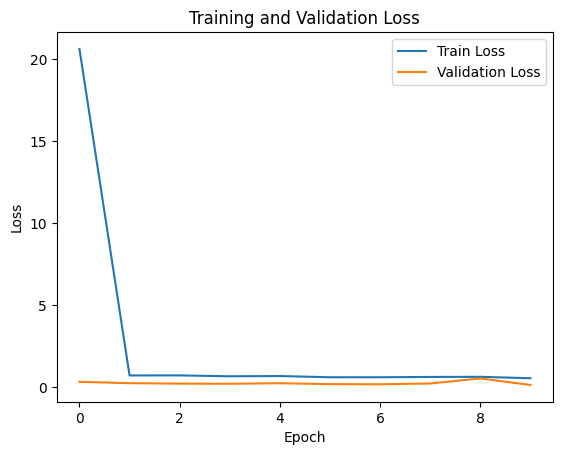

In [91]:
# Plot training and validation Loss
plt.plot(history_CSCO.history['loss'], label='Train Loss')
plt.plot(history_CSCO.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretasi: <br>
* Train Loss: pada epoch pertama terlihat training loss sangat tinggi namun pada epoch selanjutnya mengalami penurunan yang sangat drastis dan stabil untuk epoch-epoch selanjutnya. Hal ini menunjukkan bahwa model baseline LSTM awalnya mengalami kesulitan dalam menyesuaikan data tetapi dengan cepat belajar representasi yang lebih baik pada data training setelah epoch pertama. <br>
* Validation Loss: sejak epoch pertama validation loss menunjukkan nilai yang rendah dan stabil selama pelatihan. Terlihat juga tren validation loss setelah epoch awal tampak hampir identik dengan training loss. Hal ini menunjukkan bahwa model tidak hanya melakukan pekerjaan baik dalam mempelajari data pelatihan tetapi juga mampu mempertahankan performa yang serupa pada data baru yang tidak terlihat selama pelatihan.

In [92]:
# Predictions on test data
loss_amzn = model_AMZN.evaluate(x_test_amzn, y_test_amzn)
y_pred_amzn = model_AMZN.predict(x_test_amzn)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2147.9932 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


Nilai loss 2147.9932 menunjukkan nilai yang besar dan menandakan bahwa ada kesalahan yang signifikan dalam prediksi model untuk Close prices AMZN. Hal ini juga dapat diakibatkan karena overfitting pada data pelatihan.

In [93]:
y_pred_amzn = y_pred_amzn.reshape(-1)
y_test_amzn = y_test_amzn.reshape(-1)
print("Shape of y_test_amzn:", y_test_amzn.shape)
print("Shape of y_pred_amzn:", y_pred_amzn.shape)

Shape of y_test_amzn: (576,)
Shape of y_pred_amzn: (576,)


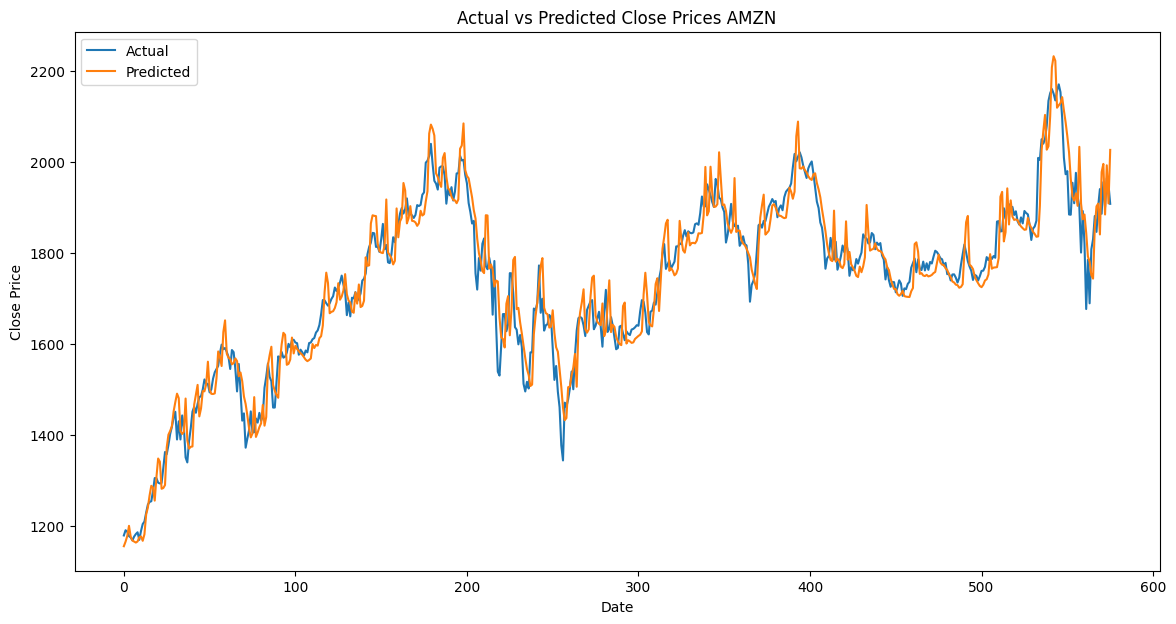

In [94]:
plt.figure(figsize=(14,7))
plt.plot(y_test_amzn, label='Actual')
plt.plot(y_pred_amzn, label='Predicted')
plt.title('Actual vs Predicted Close Prices AMZN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Interpretasi: <br>
* Kurva Close prices yang diprediksi cukup sesuai dengan kurva Close prices aktualnya, hal ini sebenarnya menunjukkan bahwa model LSTM berhasil mengikuti pergerakan tren saham. Meskipun ada beberapa titik di mana prediksi tidak tepat sepenuhnya, namun secara keseluruhan prediksi cukup akurat.

In [95]:
loss_csco = model_CSCO.evaluate(x_test_csco, y_test_csco)
y_pred_csco = model_CSCO.predict(x_test_csco)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.3487
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Nilai loss 0.3487 menunjukkan bahwa model memiliki nilai loss atau error yang cukup rendah dalam prediksi Close Price pada CSCO. Hal ini mengindikasikan nilai akurasi model yang baik untuk memprediksi suatu data baru.

In [96]:
y_pred_csco = y_pred_csco.reshape(-1)
y_test_csco = y_test_csco.reshape(-1)
print("Shape of y_test_amzn:", y_test_amzn.shape)
print("Shape of y_pred_amzn:", y_pred_amzn.shape)

Shape of y_test_amzn: (576,)
Shape of y_pred_amzn: (576,)


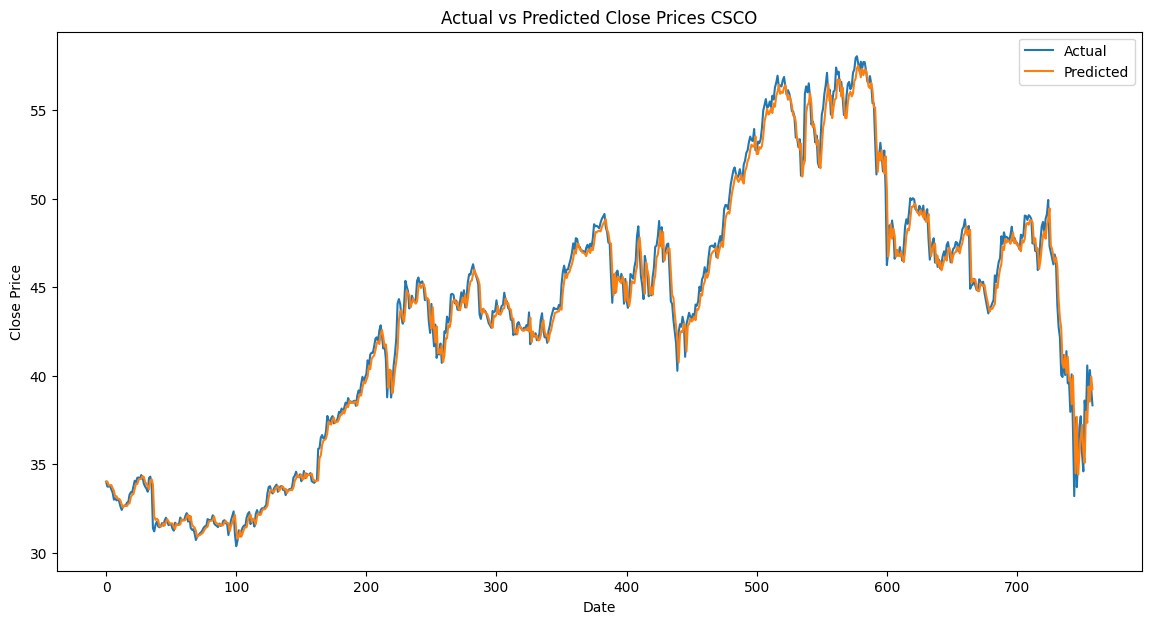

In [97]:
plt.figure(figsize=(14,7))
plt.plot(y_test_csco, label='Actual')
plt.plot(y_pred_csco, label='Predicted')
plt.title('Actual vs Predicted Close Prices CSCO')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Interpretasi: <br>
* Kurva Close prices yang diprediksi sangat mendekati Close price aktualnya. Hal ini menunjukkan bahwa model baseline LSTM mampu memprediksi secara akurat dan sudah mengikuti tren actual datanya.

#### Model Modifikasi

Modifikasi arsitektur:<br>
1. Menambahkan dropout layer
2. Menambahkan kernel regularisasi L2 pada LSTM dan Dense layer
3. Mengubah hyperparameter:
    * Meningkatkan jumlah units pada LSTM
    * Menggunakan learning rate yang lebih rendah 
    * Menggunakan early stopping
    * Meningkatkan jumlah epochs
    * Menggunakan batch size

In [98]:
def create_LSTM2():
  baseline_model = Sequential()
  baseline_model.add(LSTM(units=100, activation='relu', input_shape=(5, 1), kernel_regularizer=l2(0.01)))
  baseline_model.add(Dropout(0.25))
  baseline_model.add(Dense(units=1, kernel_regularizer=l2(0.01)))
  baseline_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

  return baseline_model

In [99]:
model_AMZN2 = create_LSTM2()
model_AMZN2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [101]:
history_AMZN2 = model_AMZN2.fit(x_train_amzn, y_train_amzn, epochs=30, batch_size=128, validation_data=(x_val_amzn, y_val_amzn), callbacks=[early_stopping])

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 32074.1582 - val_loss: 722028.6875
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26217.4473 - val_loss: 521570.7188
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16397.1426 - val_loss: 126674.5703
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2861.4558 - val_loss: 3804.9626
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 870.8768 - val_loss: 615.7271
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 747.5608 - val_loss: 543.8161
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 697.4557 - val_loss: 630.8610
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 669.1558 - val_loss: 435.8335
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 688.0239 - val_loss: 728.4938
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 702.5678 - val_loss: 447.1992
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 639.6917 - val_loss: 474.7073
Epoch 12/30


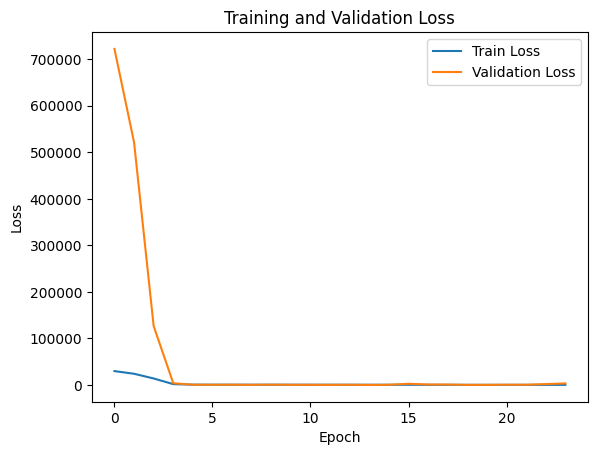

In [102]:
# Plot training and validation Loss
plt.plot(history_AMZN2.history['loss'], label='Train Loss')
plt.plot(history_AMZN2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretasi: <br>
* Train Loss: nilai train loss pada awal pelatihan ada penurunan dan kemudian stabil di sekitar nilai yang rendah. Hal ini menunjukkan bahwa model modifikasi belajar dengan baik dari data pelatihan dan tidak overfitting pada data AMZN.<br>
* Validation Loss: nilai validation loss pada awal pelatihan sangat tinggi, tetapi menurun drastis dalam beberapa epoch pertama dan kemudian stabil mengikuti tren pada pelatihan. 


In [125]:
y_test_amzn = np.reshape(y_test_amzn, (576, 1, 1))

In [126]:
# Predictions on test data
loss_amzn = model_AMZN2.evaluate(x_test_amzn, y_test_amzn)
y_pred_amzn = model_AMZN2.predict(x_test_amzn)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1385.0192
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Interpretasi: <br>
Nilai loss 1385.0192 menunjukkan nilai yang masih besar juga namun lebih baik dibandingkan baseline arsitektur sebelumnya. Hal ini dapat saja terjadi mungkin karena data pada validasi tidak cukup representatif atau model masih belum cukup kompleks untuk menangkap pola dalam data AMZN.

In [128]:
y_pred_amzn = y_pred_amzn.reshape(-1)
y_test_amzn = y_test_amzn.reshape(-1)

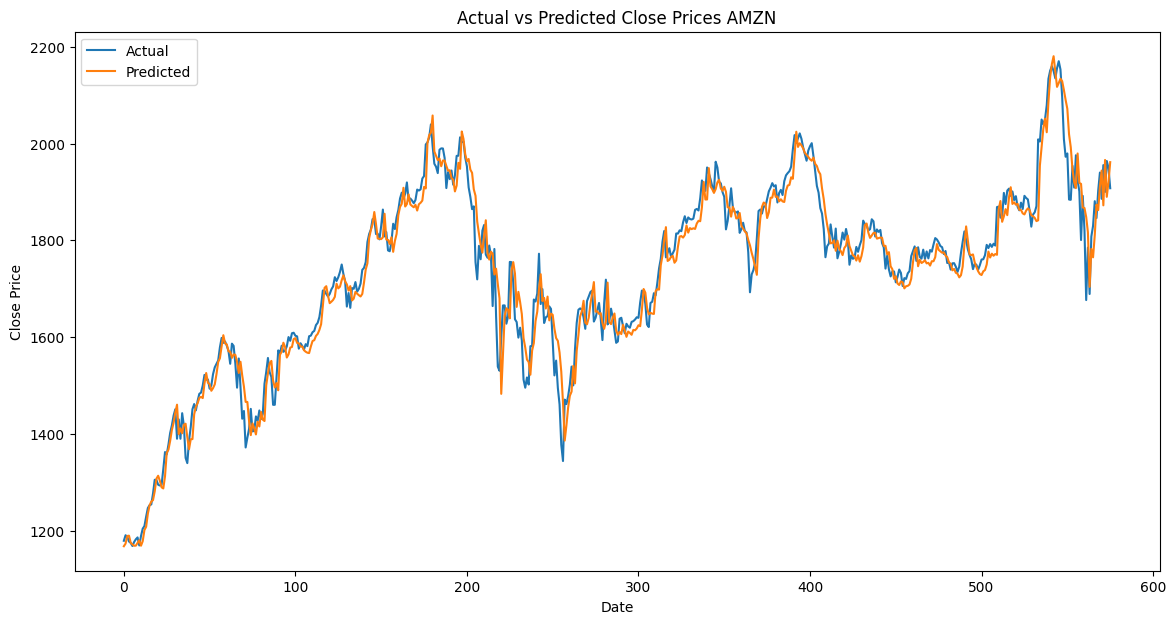

In [129]:
plt.figure(figsize=(14,7))
plt.plot(y_test_amzn, label='Actual')
plt.plot(y_pred_amzn, label='Predicted')
plt.title('Actual vs Predicted Close Prices AMZN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Interpretasi:<br>
Model LSTM mampu mengikuti tren umum dari Close prices AMZN, baik saat harga naik maupun turun. Hal ini terlihat dari garis prediksi yang mengikuti pergerakan garis aktual dengan cukup baik. Meskipun prediksi cukup dekat dengan nilai aktual, ada beberapa titik di mana garis prediksi menyimpang dari aktual.

In [103]:
model_CSCO2 = create_LSTM2()
model_CSCO2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history_CSCO2 = model_CSCO2.fit(x_train_csco, y_train_csco, epochs=30, batch_size=128, validation_data=(x_val_csco, y_val_csco), callbacks=[early_stopping])

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 325.9887 - val_loss: 404.6964
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199.5573 - val_loss: 48.4996
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3459 - val_loss: 0.7940
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.3179 - val_loss: 1.3161
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3491 - val_loss: 1.0502
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7462 - val_loss: 1.0668
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6309 - val_loss: 0.7076
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3215 - val_loss: 0.4430
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8919 - val_loss: 0.6934
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8998 - val_loss: 0.4515
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9000 - val_loss: 0.5191
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.260

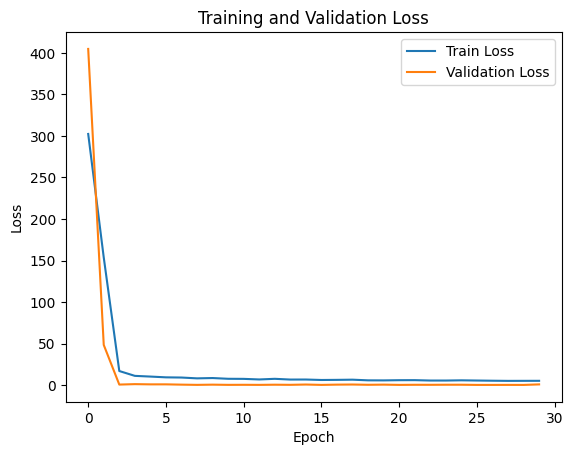

In [105]:
plt.plot(history_CSCO2.history['loss'], label='Train Loss')
plt.plot(history_CSCO2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretasi: <br>
* Pada awal pelatihan, baik train loss maupun validation loss menunjukkan penurunan yang signifikan. Hal ini menunjukkan bahwa model dengan cepat belajar pola dalam data dan mengurangi kesalahan prediksinya dengan signifikan pada tahap awal pelatihan.
* Terlihat juga perbedaan antara train dan validation loss relatif kecil. Hal ini menunjukkan bahwa model tidak mengalami overfitting yang signifikan, karena loss pada data pelatihan dan validasi hampir sama. Maka model mampu men-generalisasi dengan baik terhadap data yang belum dilihat sebelumnya.

In [131]:
y_test_csco = np.reshape(y_test_csco, (759, 1, 1))

In [132]:
# Predictions on test data
loss_csco = model_CSCO2.evaluate(x_test_csco, y_test_csco)
y_pred_csco = model_CSCO2.predict(x_test_csco)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6865
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Interpretasi:<br>
Nilai loss yang dihasilkan adalah 0.6865 dimana nilai ini menunjukkan bahwa model modifikasi memiliki kesalahan prediksi pada data test CSCO cukup kecil dan model memiliki performa cukup baik dalam memprediksi data baru. 

In [133]:
y_pred_csco = y_pred_csco.reshape(-1)
y_test_csco = y_test_csco.reshape(-1)

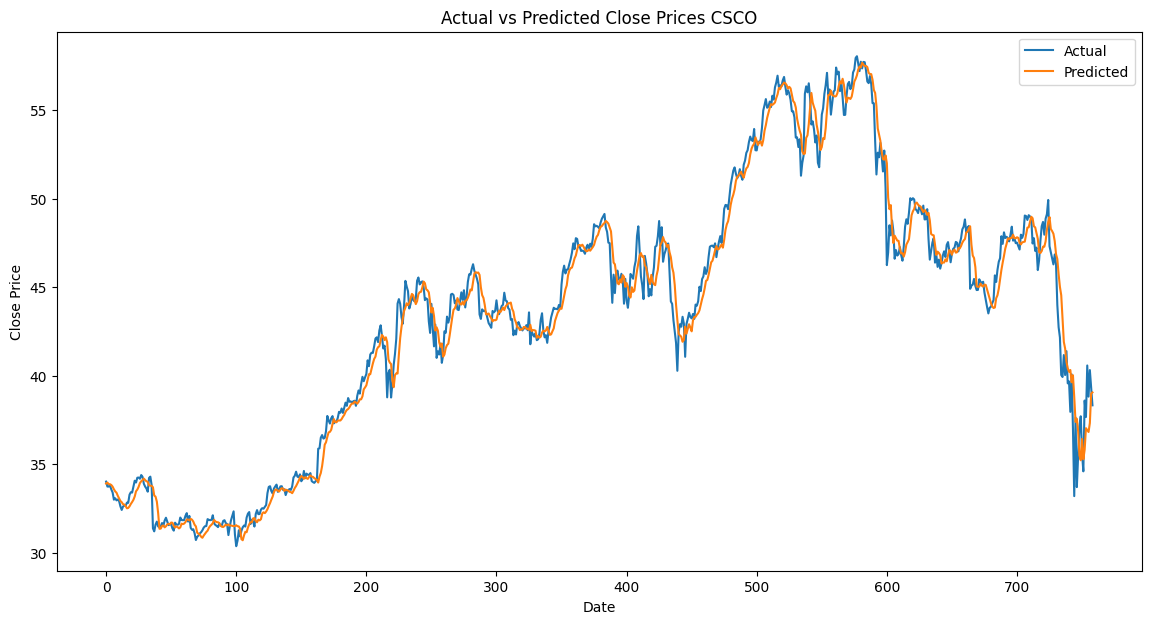

In [134]:
plt.figure(figsize=(14,7))
plt.plot(y_test_csco, label='Actual')
plt.plot(y_pred_csco, label='Predicted')
plt.title('Actual vs Predicted Close Prices CSCO')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### Modifikasi 2

In [106]:
def create_LSTM3():
  baseline_model = Sequential()
  baseline_model.add(LSTM(units=100, activation='relu', input_shape=(5, 1)))
  baseline_model.add(Dense(units=1))
  baseline_model.compile(optimizer=Adam(), loss='mse')

  return baseline_model

In [107]:
model_AMZN3 = create_LSTM3()
model_AMZN3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
history_AMZN3 = model_AMZN3.fit(x_train_amzn, y_train_amzn, epochs=30, batch_size=64, validation_data=(x_val_amzn, y_val_amzn), callbacks=[early_stopping])

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9203.0693 - val_loss: 476.3346
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.1380 - val_loss: 413.9640
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.5931 - val_loss: 457.7925
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.0944 - val_loss: 362.2347
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.5603 - val_loss: 355.4848
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.9832 - val_loss: 358.8196
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.4958 - val_loss: 350.4944
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.8123 - val_loss: 406.3447
Epoch 9/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.3553 - val_loss: 423.9471
Epoch 10/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.4112 - val_loss: 336.2851


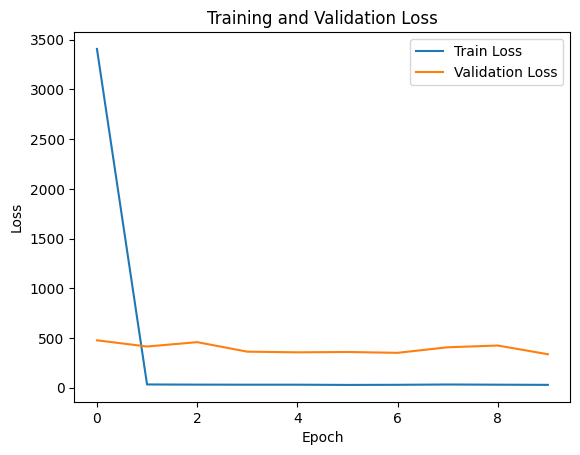

In [109]:
plt.plot(history_AMZN3.history['loss'], label='Train Loss')
plt.plot(history_AMZN3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
model_CSCO3 = create_LSTM3()
model_CSCO3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history_CSCO3 = model_CSCO3.fit(x_train_csco, y_train_csco, epochs=30, batch_size=64, validation_data=(x_val_csco, y_val_csco), callbacks=[early_stopping])

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 110.2507 - val_loss: 0.3275
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2371 - val_loss: 0.3336
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0481 - val_loss: 0.3396
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8513 - val_loss: 0.5182
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8900 - val_loss: 0.2427
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6885 - val_loss: 0.3416
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6912 - val_loss: 0.2846
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6720 - val_loss: 0.2123
Epoch 9/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6803 - val_loss: 0.1913
Epoch 10/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5855 - val_loss: 0.5287
Epoch 11/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5869 - val_loss: 0.3137
Epoch 12/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5869 - val_

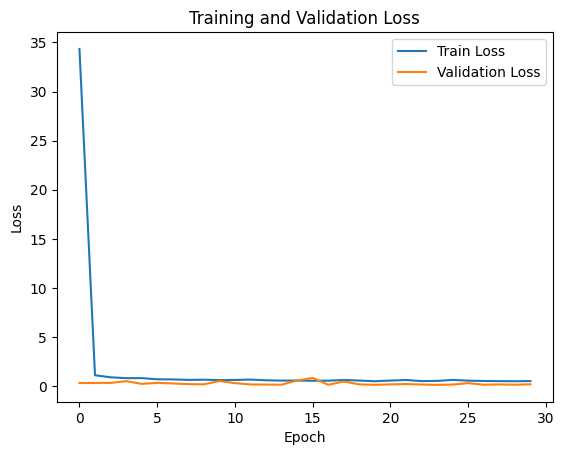

In [112]:
plt.plot(history_CSCO3.history['loss'], label='Train Loss')
plt.plot(history_CSCO3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluation

In [113]:
def evaluate_models(model, x_test, y_test):
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results = {
        'RMSE:': rmse,
        'MAE:': mae,
        'MAPE:': mape
    }

    return results

In [114]:
print("Evaluasi Model Baseline LSTM AMZN")
print(evaluate_models(model_AMZN, x_test_amzn, y_test_amzn))

print("\nEvaluasi Model Modifikasi LSTM AMZN")
print(evaluate_models(model_AMZN2, x_test_amzn, y_test_amzn))
print(evaluate_models(model_AMZN3, x_test_amzn, y_test_amzn))

Evaluasi Model Baseline LSTM AMZN
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
{'RMSE:': 49.82020504860801, 'MAE:': 38.593126932779946, 'MAPE:': 0.022462380837256303}

Evaluasi Model Modifikasi LSTM AMZN
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
{'RMSE:': 40.98644222698643, 'MAE:': 29.99756728278266, 'MAPE:': 0.017557333862278576}
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
{'RMSE:': 72.87910121371024, 'MAE:': 49.8468132019043, 'MAPE:': 0.02901593534879569}


**Evaluasi:**<br>
1. Baseline:<br>
RMSE --> 49.82<br>
MAE --> 38.59<br>
MAPE --> 0.0225 atau 2.25%

2. Modifikasi 1:<br>
RMSE --> 40.99<br>
MAE --> 30.00<br>
MAPE --> 0.0176 atau 1.76%

<br>
Kesimpulan: Pada modifikasi LSTM menunjukkan peningkatan kinerja dibandingkan dengan model baseline, yang dimana dapat dilihat dari nilai RMSE, MAE, dan MAPE yang lebih rendah dan menunjukkan kemampuan memberikan prediksi yang lebih akurat.

In [115]:
print("Evaluasi Model Baseline LSTM CSCO")
print(evaluate_models(model_CSCO, x_test_amzn, y_test_amzn))

print("\nEvaluasi Model Modifikasi LSTM CSCO")
print(evaluate_models(model_CSCO2, x_test_amzn, y_test_amzn))

print(evaluate_models(model_CSCO3, x_test_amzn, y_test_amzn))

Evaluasi Model Baseline LSTM CSCO
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
{'RMSE:': 120.77259391678778, 'MAE:': 109.23218070136176, 'MAPE:': 0.06336609416437966}

Evaluasi Model Modifikasi LSTM CSCO
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
{'RMSE:': 111.72863025758086, 'MAE:': 87.63581085205078, 'MAPE:': 0.05103247206099145}
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
{'RMSE:': 152.02336959819746, 'MAE:': 146.04139624701605, 'MAPE:': 0.08417016019986291}


**Evaluasi:**<br>
1. Baseline:<br>
RMSE --> 120.77<br>
MAE --> 109.23<br>
MAPE --> 0.0634 atau 6.34%

2. Modifikasi 1:<br>
RMSE --> 111.73<br>
MAE --> 87.64<br>
MAPE --> 0.0510 atau 5.10%

<br>
Kesimpulan: Pada modifikasi LSTM menunjukkan peningkatan kinerja dibandingkan dengan model baseline, yang dimana dapat dilihat dari nilai RMSE, MAE, dan MAPE yang lebih rendah dan menunjukkan kemampuan memberikan prediksi yang lebih akurat.